pre-class

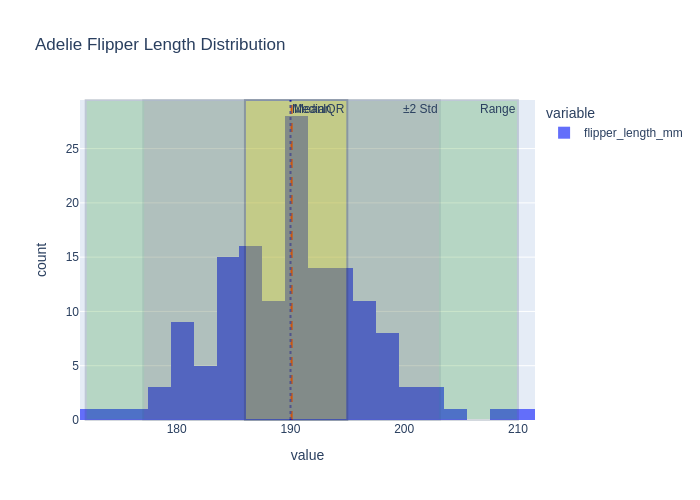

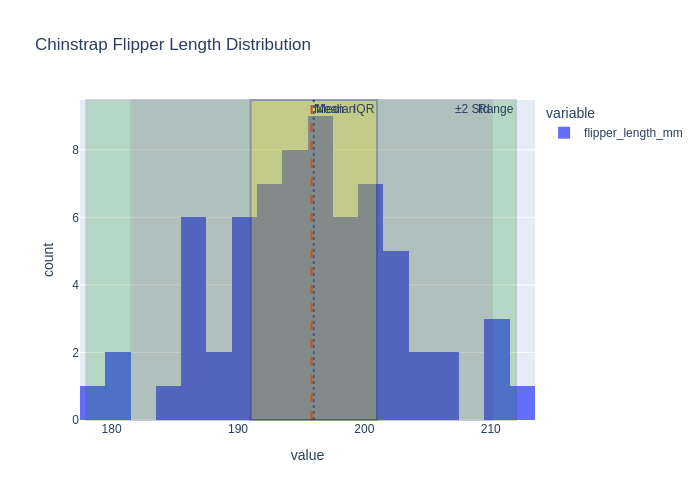

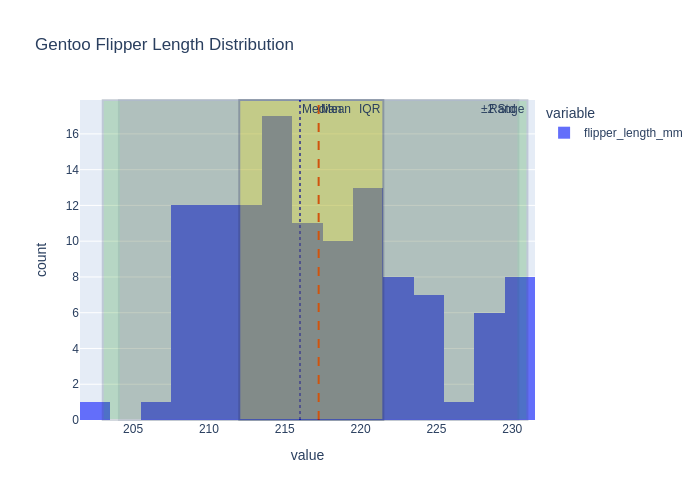

In [21]:
#1

import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns

# Load penguins dataset
penguins = sns.load_dataset('penguins').dropna()

# Loop through species and create separate histograms
for species in penguins['species'].unique():
    # Filter data by species
    data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate basic stats
    mean_val = data.mean()
    median_val = data.median()
    min_val = data.min()
    max_val = data.max()
    std_val = data.std()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    
    # Create histogram
    fig = px.histogram(data, nbins=20, title=f'{species} Flipper Length Distribution')
    
    # Add lines for mean and median
    fig.add_vline(x=mean_val, line_color='red', line_dash='dash', annotation_text='Mean')
    fig.add_vline(x=median_val, line_color='blue', line_dash='dot', annotation_text='Median')
    
    # Add rectangles for range, IQR, and 2 std
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="green", opacity=0.2, annotation_text="Range")
    fig.add_vrect(x0=q1, x1=q3, fillcolor="yellow", opacity=0.3, annotation_text="IQR")
    fig.add_vrect(x0=mean_val - 2*std_val, x1=mean_val + 2*std_val, fillcolor="purple", opacity=0.1, annotation_text="±2 Std")
    
    # Show figure
    fig.show("png")




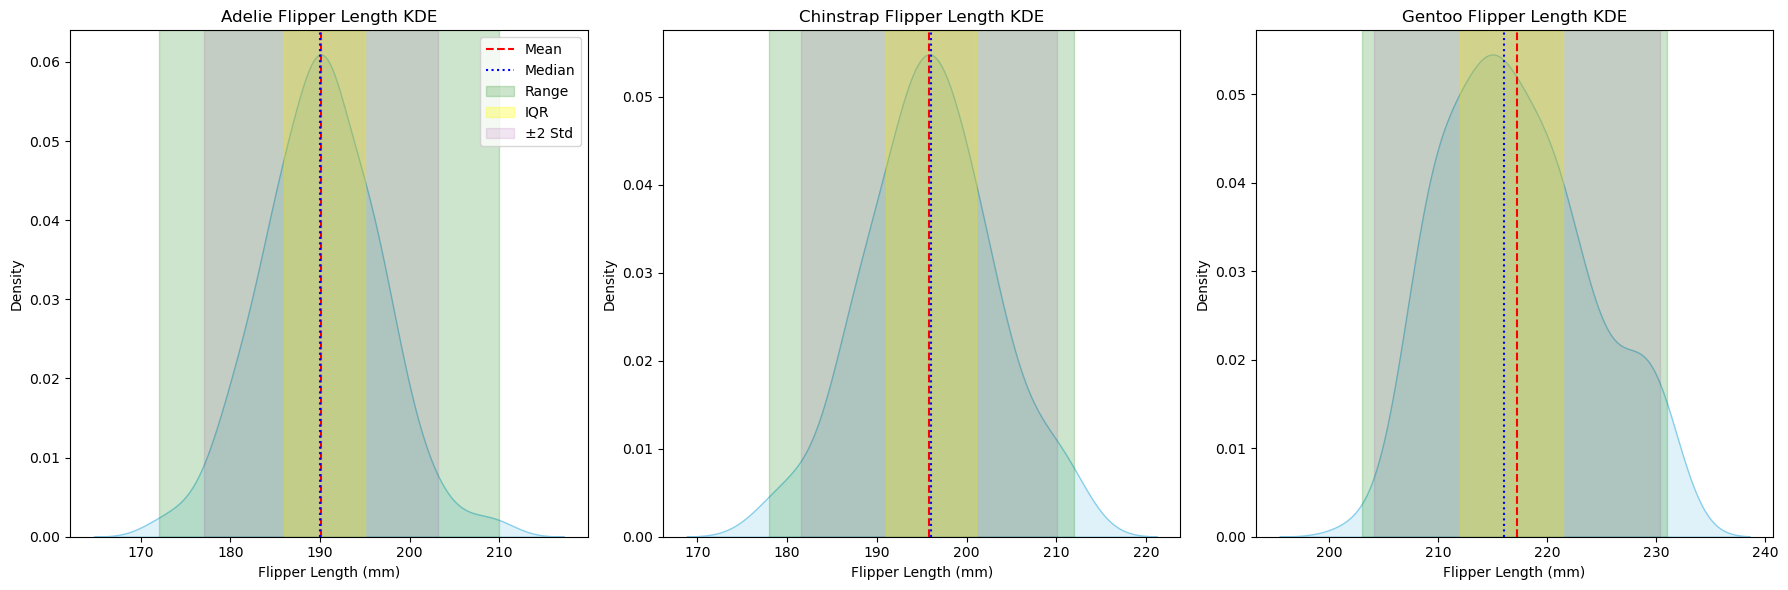

In [20]:
#2
# I told chaatbot to give me Kenel density graph for the datas.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset('penguins').dropna()

# Set up the subplots (one row, three columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define species names for labeling
species_list = penguins['species'].unique()

# Iterate through each species and plot
for i, species in enumerate(species_list):
    # Filter data by species
    data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate basic statistics
    mean_val = data.mean()
    median_val = data.median()
    min_val = data.min()
    max_val = data.max()
    std_val = data.std()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    
    # Plot KDE for flipper_length_mm
    sns.kdeplot(data, ax=axes[i], fill=True, color="skyblue")
    
    # Add vertical lines for mean and median
    axes[i].axvline(mean_val, color='red', linestyle='--', label='Mean')
    axes[i].axvline(median_val, color='blue', linestyle=':', label='Median')
    
    # Add shaded areas for range, IQR, and ±2 standard deviations
    axes[i].axvspan(min_val, max_val, color='green', alpha=0.2, label='Range')
    axes[i].axvspan(q1, q3, color='yellow', alpha=0.3, label='IQR')
    axes[i].axvspan(mean_val - 2 * std_val, mean_val + 2 * std_val, color='purple', alpha=0.1, label='±2 Std')
    
    # Add titles and labels
    axes[i].set_title(f'{species} Flipper Length KDE')
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].set_ylabel('Density')
    
    # Show legends for the first plot only
    if i == 0:
        axes[i].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show("png")


3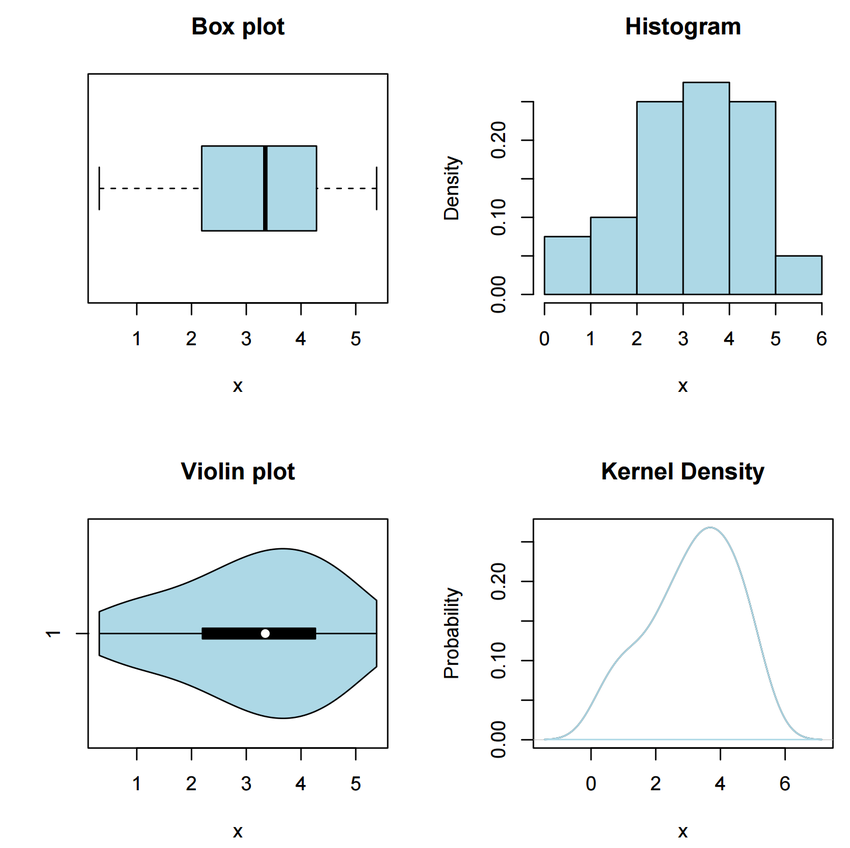

3)

Here is my understanding for these 3 types of graph:

Histogram	
pros:
- Simple to understand.
- Shows frequency/count in bins.
- Useful for discrete data.
cons
- Sensitive to bin size.
- Binning can obscure important details.
- Not ideal for smooth data.

KDE Plot

pros:
- Provides a smooth, continuous estimate.
- Shows overall distribution without binning.
cons:
- More abstract and harder to interpret.
- Sensitive to bandwidth selection.
- Over-smoothing.


Box Plot	- Great for comparing groups.
pros:
- Highlights outliers and skewness.
- Summarizes large data.	
cons:
- Doesn’t show the full shape of the distribution.
- Can hide important details (e.g., multimodality).




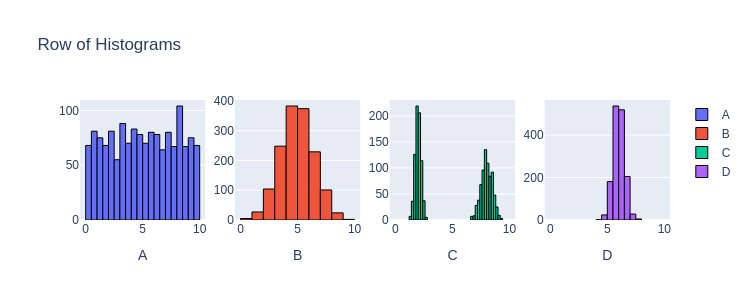

In [6]:
#4)

from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show('png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS



In [9]:
import numpy as np
from scipy import stats

# Function to compare datasets based on their means and variances
def compare_means_and_variances(datasets):
    means = [np.mean(data) for data in datasets]
    variances = [np.var(data) for data in datasets]
    
    similar_mean_threshold = 0.5   # Define a threshold for "similar" mean
    similar_variance_threshold = 0.5   # Define a threshold for "similar" variance

    result = {
        "Similar means and similar variances": [],
        "Similar means but different variances": [],
        "Similar variances but different means": [],
        "Quite different means and quite different variances": []
    }

    # Compare each pair of datasets
    for i in range(len(datasets)):
        for j in range(i + 1, len(datasets)):
            mean_diff = abs(means[i] - means[j])
            var_diff = abs(variances[i] - variances[j])
            
            if mean_diff <= similar_mean_threshold and var_diff <= similar_variance_threshold:
                result["Similar means and similar variances"].append((i + 1, j + 1))
            elif mean_diff <= similar_mean_threshold and var_diff > similar_variance_threshold:
                result["Similar means but different variances"].append((i + 1, j + 1))
            elif mean_diff > similar_mean_threshold and var_diff <= similar_variance_threshold:
                result["Similar variances but different means"].append((i + 1, j + 1))
            else:
                result["Quite different means and quite different variances"].append((i + 1, j + 1))
    
    return result

# Generate the datasets
n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

datasets = [data1, data2, data3, data4]

# Run the comparison
comparison_result = compare_means_and_variances(datasets)

# Print the results
for category, pairs in comparison_result.items():
    print(f"{category}: {pairs}")

# Display means and variances for reference
means = [np.mean(data) for data in datasets]
variances = [np.var(data) for data in datasets]

print("\nMeans:", means)
print("Variances:", variances)


Similar means and similar variances: []
Similar means but different variances: [(1, 2), (1, 3), (2, 3)]
Similar variances but different means: []
Quite different means and quite different variances: [(1, 4), (2, 4), (3, 4)]

Means: [4.992736574550256, 5.03714217037657, 5.0067056412788356, 5.992150664604691]
Variances: [8.035306972536025, 2.2159648546157267, 9.188796309924818, 0.2394924496281304]


4)

Which datasets have similar means and similar variances?


Data A and C have similar means and similar variances. 


Which datasets have similar means but quite different variances?


Data A and B have similar means but quite different variences. Also, A and C


Which datasets have similar variances but quite different means?


B and D have similar variences but quite different means.


Which datasets have quite different means and quite different variances?


Data A and D have quite different means and quite different variences. Also C and D. 


5)


leftward skewed:

A left-skewed distribution has a longer tail on the left (toward lower values). Most of the data points cluster on the right side, and the extreme values are on the left.

Mean < Median: The mean is pulled to the left by the lower values in the tail, making it smaller than the median.


rightward skewed:



A right-skewed distribution has a longer tail on the right (toward higher values). Most of the data points cluster on the left side, and the extreme values (outliers) are on the right.

Mean > Median: The mean is pulled to the right by the higher values in the tail, making it larger than the median.


In [3]:
#6)

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns




,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


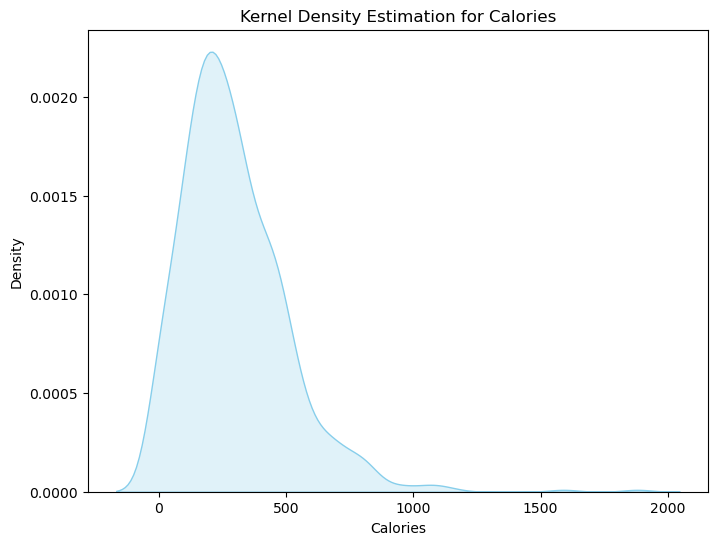

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Plot KDE for a chosen column (e.g., 'calories')
plt.figure(figsize=(8, 6))
sns.kdeplot(df['calories'].dropna(), fill=True, color='skyblue')
plt.title('Kernel Density Estimation for Calories')
plt.xlabel('Calories')
plt.ylabel('Density')
plt.show('PNG')


here is the some step supported by the chatbot: 

1.Load the dataset.
2. set what is the data set is about and what is each colunms represent
3.Perform summary statistics on key features.
4..Visualize interesting relationships and aspects using plots.



First is the overview of the dataset. this data set is about fast food nutrition and have columns such as:
Total calories per serving.
Calories from fat: The calories derived from fat.
Total fat (g), Saturated fat (g), Trans fat (g).
Cholesterol (mg), Sodium (mg).
Carbohydrates (g), Sugars (g), Protein (g).
Vitamin A, Vitamin C, Calcium, and Iron (daily value percentages).

As a conculsion they are all qualitive and nominal datas. 



Next I used chatbot to generate summary statistics to help me understand more about the distribution of the data:





Based on the above data many of the information concludes that high-calorie foods are often linked to higher fat content, particularly saturated fats, which can be a health concern. Protein content tends to increase with calorie content, but the relationship is less direct compared to fat. Sodium levels vary widely across the dataset and do not show as strong a correlation with other nutritional aspects like calories or fat. so couldn't really tell the relationship between sodium and other things like fat. 



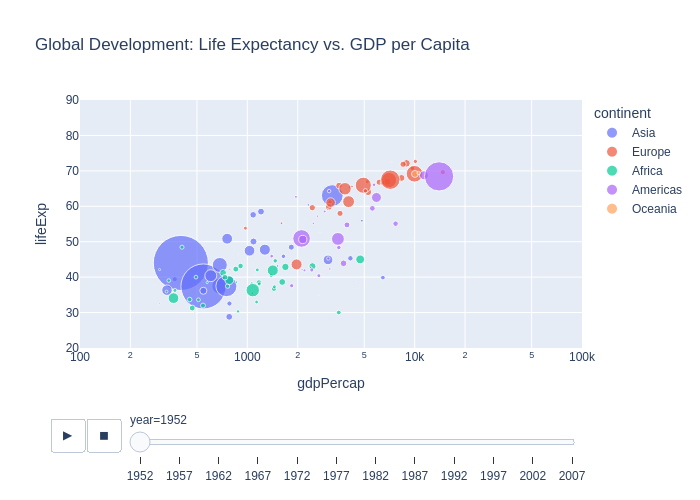

In [2]:
#7) #here is my animation and chatgpt suppoted me. 


import plotly.express as px

# Load the Gapminder dataset
gapminder = px.data.gapminder()

# Create the animated bubble chart
fig = px.scatter(
    gapminder,
    x="gdpPercap",
    y="lifeExp",
    animation_frame="year",
    animation_group="country",
    size="pop",
    color="continent",
    hover_name="country",
    log_x=True,
    size_max=60,
    range_x=[100, 100000],
    range_y=[20, 90],
    title="Global Development: Life Expectancy vs. GDP per Capita"
)

# Show the animation
fig.show("png")




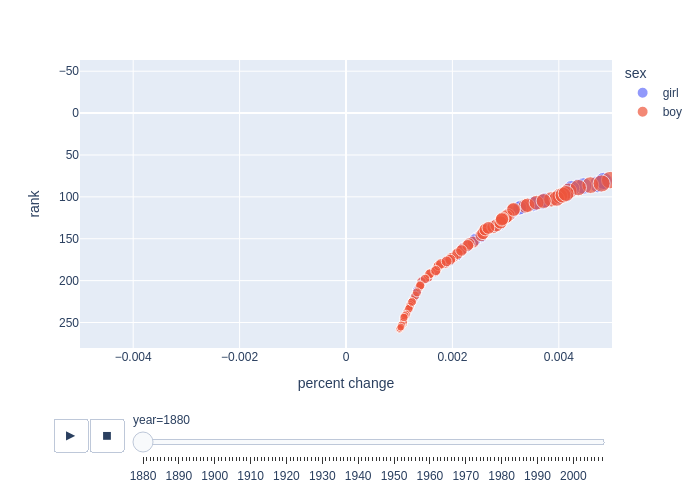

In [4]:
#8)
#In this task, I modified the code to create a second version of 
the figure using the plotly.express.scatter function. 
This version visualizes baby name data by plotting 
"percent change" on the x-axis, "rank" on the y-axis, "percent" as the size of the markers, and "sex" as the color. The figure is animated over the "year" and grouped by the "name". The size of the bubbles represents the name's percentage prevalence, with the maximum size set to 50 for better visibility.



import pandas as pd
import plotly.express as px

# Load the dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Modify the dataset
bn['name'] = bn['name'] + " " + bn['sex']  # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name', 'year'])

# Create the percent change from the previous year
bn['percent change'] = bn['percent'].diff()
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Sort by year and filter common names
bn = bn.sort_values('year')
bn = bn[bn.percent > 0.001]  # restrict to "common" names

# Create the scatter plot
fig = px.scatter(bn, 
                 x="percent change", 
                 y="rank", 
                 animation_frame="year", 
                 animation_group="name", 
                 size="percent", 
                 color="sex", 
                 hover_name="name", 
                 size_max=50, 
                 range_x=[-0.005, 0.005])

# Update the y-axis to put rank 1 on top
fig.update_yaxes(autorange='reversed')

# Display the figure using the correct renderer
fig.show(renderer="png")

9) I have reviewd weekly textbook and used chatbot to help me understand and content that I do not understand. 

here is the link for the chatbot:

https://chatgpt.com/c/66f05e18-b4e0-8013-a403-77e3c3255db4